# Part 0: Your first neuron


## Recurrent Unit
Let's define the following recurrent unit
$$ h_t = f(W_{hh} h_{t-1} + W_{hx}x_t) $$
where $$t=1,\ldots,\infty,h_t \text{ is the current state}, h_{t-1} \text{ is the previous state}, $$
$$x_t \text{ is the current input}.$$
Here, f(y) is the sigmoid function, $$f(y)=\frac{1}{1+\exp(-y)}.$$

What does the sigmoid function look like?

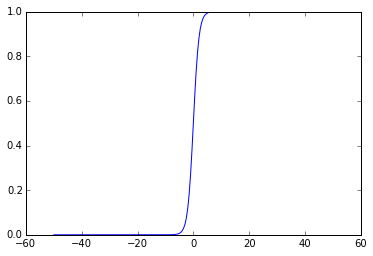

In [17]:
## Plot sigmoid function in 1D
%matplotlib inline
import matplotlib
import numpy as np

import matplotlib.pyplot as plt

def sigmoid(y):
    return 1 / (1 + np.exp(-y))

# You can change the bound from 5, 10, 20 up to 50 to see the shape change
bound = 5
x = np.arange(-bound, bound, 0.5)
plt.plot(x, sigmoid(x))
plt.show()

In [29]:
## How to code algebracially?

## Matrix-vector multiplication
## A is a nxt maxtrix, b is a tx1 vector
## c is a nx1 vector, the multiplication result of A and b
n = 3
t = 5
A = np.ones([n, t])   # initlize A as a nxt all one matrix
print 'The size of matrix A is {}x{}'.format(A.shape[0], A.shape[1])
b = np.ones([t, 1]) # initlize b as a tx1 all one vector
print 'The size of vector b is {}x{}'.format(b.shape[0], b.shape[1])
c = np.dot(A, b)
print 'The size of vector c is {}x{}'.format(c.shape[0], c.shape[1])

print 'The vector c is'_
print c.astype('i')


The size of matrix A is 3x5
The size of vector b is 5x1
The size of vector c is 3x1
The vector c is
[[ 5]
 [ 5]
 [ 5]]


Let's code up the forward function of the recurrent unit.
Please fill in < input your code here > below.

In [38]:
## Given input x, previous state hprev, parameter matrices Whx and Whh
## Compute the current state h
## Code up the forward function of the recurrent unit define above
## Remember to return the current state h

hidden_size = 10
input_size = 5

Whh = np.zeros([hidden_size, hidden_size])
Whh += np.random.uniform(-0.1, 0.1, [hidden_size, hidden_size])

Whx = np.zeros([hidden_size, input_size])
Whx += np.random.uniform(-0.1, 0.1, [hidden_size, input_size])

def forward_function(x, hprev, Whx, Whh):
    ## first compute the matrix-vector multiplication
    # Whx x + Whh hprev
    ##h = <input your code here>
    h = np.dot(Whx, x) + np.dot(Whh, hprev)
    ## use the sigmoid function to compute the current state
    #h = sigmoid(<input your code here>)
    h = sigmoid(h)
    return h


x = np.random.randn(input_size, 1)
hprev = np.zeros([hidden_size, 1])
h = forward_function(x, hprev, Whx, Whh)
    

In [ ]:
## perform assert here

An import component of making the neuron to learn is to train it through gradient optimization. In order to do that, we first have to learn to take the derivative of the above unit.
Let's do the derivatives in matrix form!

Here is the cheatsheet:

First let us define
$$ y = W_{hh} h_{t-1} + W_{hx} x_t.$$
### Important gradient one: 

$$ 
\frac{\partial h_t}{\partial h_{t-1}} = f\prime(y)^T W_{hh},
$$
where
$$
f\prime(y)=\frac{\partial f(y)}{y}=\frac{\partial \frac{1}{1+\exp(-y)}}{\partial y}=\frac{\exp(-y)}{(1+\exp(-y))^2} = (1-f(y))f(y),
$$ is the gradient of sigmoid function.
Can you verfiy the above gradient?

### Important gradient two:
$$ 
\frac{\partial h_t}{\partial W_{hh}} = \frac{\partial h_t}{\partial y} h_{t-1}^T = f\prime(y) h_{t-1}^T
$$

### Important gradient three:
$$ 
\frac{\partial h_t}{\partial W_{hx}} = \frac{\partial h_t}{\partial y} x_{t}^T = f\prime(y) x_{t}^T
$$


Let's code up a backward function which accepts a training/error signal to weight the gradients and output the three gradients above.

In [39]:
## Given a training/error signal dEdh, input x, previous state hprev
## parameters Whh, Whx
## Return the three graidents above

def backward_function(x, hprev, dEdh, Whx, Whh):
    ## compute the gradient of sigmoid function
    #f_prime = <input your code here>
    f_prime = (1 - h) * h
    ## weight the gradient by training/error signal
    f_prime *= dEdh
    ## compute the gradient one 
    #dEdhprev = <input your code here>
    dEdhprev = np.dot(f_prime.T, Whh)
    ## compute the gradient two
    # dWhh = <input your code here>
    dWhh = np.dot(f_prime, hprev.T)
    ## compute the gradient three
    # dWhx = <input your code here>
    dWhx = np.dot(f_prime, x.T)
    return f_prime.T, dWhx, dWhh

# compute gradients
E = np.sum(h)
dEdh = np.ones([hidden_size, 1])

dEdhprev, dWhx, dWhh = backward_function(x, hprev, dEdh, Whx, Whh)
    
    

In [40]:
## Check whether your code is right

# Numerical gradient computation
epsilon = 1e-7                                         
numdWhh = np.zeros([hidden_size,hidden_size])       
for i in range(hidden_size):                           
    for j in range(hidden_size):                       
        newWhh = np.copy(Whh)                          
        newWhh[i,j] += epsilon                         
                                                           
        h = forward_function(x, hprev, Whx, newWhh)
        newE = np.sum(h)                               
        numdWhh[i,j] = (newE - E) / epsilon            
                                                           
diff = np.sum(numdWhh - dWhh)                          
assert diff < 1e-3                                     
print 'Check Passed! Diff is', diff 

Check Passed! Diff is 0.0
